<a href="https://colab.research.google.com/github/jackhawa/CapstoneMcgill2019/blob/master/Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import datetime 
%matplotlib inline

In [41]:
interventions_df = pd.read_csv('http://donnees.ville.montreal.qc.ca/dataset/701683f0-a838-4fe0-b4d6-a4964d9ea7f0/resource/9e67d2f3-9104-4af4-aac4-022df621a749/download/donneesouvertes-interventions-sim.csv', sep=",")
interventions_df['CREATION_DATE_TIME'] = interventions_df['CREATION_DATE_TIME'].astype('datetime64[ns]')  
interventions_df.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
0,1168,2015-01-03 20:56:02,Premier répondant,1-REPOND,33,Montréal,Sud-Ouest,8,1.0,1.0,297283.0,5035433.1,-73.596117,45.458786
1,1171,2015-01-03 21:03:52,Alarme privé ou locale,Alarmes-incendies,22,Montréal,Saint-Léonard,4,4.0,1.0,299180.0,5049284.2,-73.572020,45.583442
2,1172,2015-01-03 21:07:00,Premier répondant,1-REPOND,9,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,297259.6,5046768.2,-73.596589,45.560784
3,1177,2015-01-03 21:41:46,Premier répondant,1-REPOND,37,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,294738.3,5044817.2,-73.628847,45.543197
4,1178,2015-01-03 21:43:32,Aliments surchauffés,SANS FEU,16,Montréal,Plateau Mont-Royal,11,5.0,1.0,298505.7,5042556.1,-73.580573,45.522895


In [42]:
interventions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544070 entries, 0 to 544069
Data columns (total 14 columns):
INCIDENT_NBR          544070 non-null int64
CREATION_DATE_TIME    544070 non-null datetime64[ns]
INCIDENT_TYPE_DESC    544070 non-null object
DESCRIPTION_GROUPE    544064 non-null object
CASERNE               544070 non-null int64
NOM_VILLE             544070 non-null object
NOM_ARROND            544070 non-null object
DIVISION              544070 non-null int64
NOMBRE_UNITES         543928 non-null float64
CIV                   484490 non-null float64
MTM8_X                544070 non-null float64
MTM8_Y                544070 non-null float64
LONGITUDE             544070 non-null float64
LATITUDE              544070 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 58.1+ MB


In [43]:
interventions_df['NOM_ARROND'] = np.where(interventions_df['NOM_ARROND'] == 'Indéterminé', interventions_df['NOM_VILLE'], interventions_df['NOM_ARROND']) 
interventions_df.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
0,1168,2015-01-03 20:56:02,Premier répondant,1-REPOND,33,Montréal,Sud-Ouest,8,1.0,1.0,297283.0,5035433.1,-73.596117,45.458786
1,1171,2015-01-03 21:03:52,Alarme privé ou locale,Alarmes-incendies,22,Montréal,Saint-Léonard,4,4.0,1.0,299180.0,5049284.2,-73.572020,45.583442
2,1172,2015-01-03 21:07:00,Premier répondant,1-REPOND,9,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,297259.6,5046768.2,-73.596589,45.560784
3,1177,2015-01-03 21:41:46,Premier répondant,1-REPOND,37,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,294738.3,5044817.2,-73.628847,45.543197
4,1178,2015-01-03 21:43:32,Aliments surchauffés,SANS FEU,16,Montréal,Plateau Mont-Royal,11,5.0,1.0,298505.7,5042556.1,-73.580573,45.522895


In [0]:
fire_types = [
'10-22 avec feu',
'Feu de champ *',
'Ac.vic. feu train/m√©tro F7/DES',
'Acc. sans vict. av. feu - ext.',
'Acc. sans vict. av. feu-tunnel',
'Acc. s-vict. av. feu - pont',
'Acc. s-vict. av. feu - v.r.',
'Acc. s-vict. av. feu-b√¢timent',
'Acc. s-vict. feu - train/m√©tro',
'Acc. vict. feu - tunnel F7/MOU',
'Acc. victime feu - b√¢timent',
'Acc. victime feu - pont',
'Acc. victime feu - voie rapide',
'Acc. victime feu ext.',
'D√©chets en feu',
'Feu / 2e Alerte',
'Feu / 3e Alerte',
'Feu / 4e Alerte',
'Feu / 5e Alerte',
'Feu / Agravation possible',
'Feu d\'auto (voie rapide)',
'Feu de b√¢timent',
'Feu de chemin√©e *',
'Feu de cuisson',
'Feu de nature √©lectrique',
'Feu de navire/b√¢teau',
'Feu de v√©hicule ext√©rieur',
'Feu de v√©hicule int√©rieur',
'Feu de v√©hicule sur pont',
'feu de v√©hicule tunnel F7/MOU',
'Feu v√©h. convoi (train/m√©tro)',
'M√©tro b√¢timent /10-22 avec feu',
'M√©tro b√¢timent /10-22 sans feu',
'Senteur de feu √† l\'ext√©rieur]']

interventions_df['IS_FIRE'] = interventions_df['INCIDENT_TYPE_DESC'].isin(fire_types)

In [45]:
interventions_df.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,IS_FIRE
0,1168,2015-01-03 20:56:02,Premier répondant,1-REPOND,33,Montréal,Sud-Ouest,8,1.0,1.0,297283.0,5035433.1,-73.596117,45.458786,False
1,1171,2015-01-03 21:03:52,Alarme privé ou locale,Alarmes-incendies,22,Montréal,Saint-Léonard,4,4.0,1.0,299180.0,5049284.2,-73.572020,45.583442,False
2,1172,2015-01-03 21:07:00,Premier répondant,1-REPOND,9,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,297259.6,5046768.2,-73.596589,45.560784,False
3,1177,2015-01-03 21:41:46,Premier répondant,1-REPOND,37,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,294738.3,5044817.2,-73.628847,45.543197,False
4,1178,2015-01-03 21:43:32,Aliments surchauffés,SANS FEU,16,Montréal,Plateau Mont-Royal,11,5.0,1.0,298505.7,5042556.1,-73.580573,45.522895,False


In [46]:
interventions_df['Day'] = pd.DatetimeIndex(interventions_df['CREATION_DATE_TIME']).day
interventions_df['Month'] = pd.DatetimeIndex(interventions_df['CREATION_DATE_TIME']).month
interventions_df['Time1'] = pd.DatetimeIndex(interventions_df['CREATION_DATE_TIME']).time
interventions_df['Time2'] = '1970-01-01T' + interventions_df['Time1'].map(str)
interventions_df['Time3'] = interventions_df['Time2'].apply(lambda x: np.datetime64(x))
interventions_df['Time4'] = (interventions_df['Time3'] - np.datetime64('1970-01-01 00:00:00')).apply(lambda x: x.total_seconds())
interventions_df.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,IS_FIRE,Day,Month,Time1,Time2,Time3,Time4
0,1168,2015-01-03 20:56:02,Premier répondant,1-REPOND,33,Montréal,Sud-Ouest,8,1.0,1.0,297283.0,5035433.1,-73.596117,45.458786,False,3,1,20:56:02,1970-01-01T20:56:02,1970-01-01 20:56:02,75362.0
1,1171,2015-01-03 21:03:52,Alarme privé ou locale,Alarmes-incendies,22,Montréal,Saint-Léonard,4,4.0,1.0,299180.0,5049284.2,-73.572020,45.583442,False,3,1,21:03:52,1970-01-01T21:03:52,1970-01-01 21:03:52,75832.0
2,1172,2015-01-03 21:07:00,Premier répondant,1-REPOND,9,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,297259.6,5046768.2,-73.596589,45.560784,False,3,1,21:07:00,1970-01-01T21:07:00,1970-01-01 21:07:00,76020.0
3,1177,2015-01-03 21:41:46,Premier répondant,1-REPOND,37,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,294738.3,5044817.2,-73.628847,45.543197,False,3,1,21:41:46,1970-01-01T21:41:46,1970-01-01 21:41:46,78106.0
4,1178,2015-01-03 21:43:32,Aliments surchauffés,SANS FEU,16,Montréal,Plateau Mont-Royal,11,5.0,1.0,298505.7,5042556.1,-73.580573,45.522895,False,3,1,21:43:32,1970-01-01T21:43:32,1970-01-01 21:43:32,78212.0


In [47]:
bins = [0, 10800, 21600, 32400, 43200, 54000, 64800,75600.0, 86400.0]
interventions_df['TIME_BUCKET'] = np.searchsorted(bins, interventions_df['Time4'].values)
interventions_df.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,IS_FIRE,Day,Month,Time1,Time2,Time3,Time4,TIME_BUCKET
0,1168,2015-01-03 20:56:02,Premier répondant,1-REPOND,33,Montréal,Sud-Ouest,8,1.0,1.0,297283.0,5035433.1,-73.596117,45.458786,False,3,1,20:56:02,1970-01-01T20:56:02,1970-01-01 20:56:02,75362.0,7
1,1171,2015-01-03 21:03:52,Alarme privé ou locale,Alarmes-incendies,22,Montréal,Saint-Léonard,4,4.0,1.0,299180.0,5049284.2,-73.572020,45.583442,False,3,1,21:03:52,1970-01-01T21:03:52,1970-01-01 21:03:52,75832.0,8
2,1172,2015-01-03 21:07:00,Premier répondant,1-REPOND,9,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,297259.6,5046768.2,-73.596589,45.560784,False,3,1,21:07:00,1970-01-01T21:07:00,1970-01-01 21:07:00,76020.0,8
3,1177,2015-01-03 21:41:46,Premier répondant,1-REPOND,37,Montréal,Villeray / St-Michel / Parc Extension,4,1.0,1.0,294738.3,5044817.2,-73.628847,45.543197,False,3,1,21:41:46,1970-01-01T21:41:46,1970-01-01 21:41:46,78106.0,8
4,1178,2015-01-03 21:43:32,Aliments surchauffés,SANS FEU,16,Montréal,Plateau Mont-Royal,11,5.0,1.0,298505.7,5042556.1,-73.580573,45.522895,False,3,1,21:43:32,1970-01-01T21:43:32,1970-01-01 21:43:32,78212.0,8


In [48]:
data_train = interventions_df[['Month', 'Day','NOM_ARROND',  'TIME_BUCKET','IS_FIRE']]
data_train.head()

,Month,Day,NOM_ARROND,TIME_BUCKET,IS_FIRE
0,1,3,Sud-Ouest,7,False
1,1,3,Saint-Léonard,8,False
2,1,3,Villeray / St-Michel / Parc Extension,8,False
3,1,3,Villeray / St-Michel / Parc Extension,8,False
4,1,3,Plateau Mont-Royal,8,False


In [49]:
data_train = pd.DataFrame({'count' : data_train.groupby( ['Month','Day', 'NOM_ARROND','TIME_BUCKET','IS_FIRE'] ).size()}).reset_index()
data_train.head()

,Month,Day,NOM_ARROND,TIME_BUCKET,IS_FIRE,count
0,1,1,Ahuntsic / Cartierville,1,False,13
1,1,1,Ahuntsic / Cartierville,2,False,11
2,1,1,Ahuntsic / Cartierville,2,True,1
3,1,1,Ahuntsic / Cartierville,3,False,11
4,1,1,Ahuntsic / Cartierville,4,False,16


In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84376 entries, 0 to 84375
Data columns (total 6 columns):
Month          84376 non-null int64
Day            84376 non-null int64
NOM_ARROND     84376 non-null object
TIME_BUCKET    84376 non-null int64
IS_FIRE        84376 non-null bool
count          84376 non-null int64
dtypes: bool(1), int64(4), object(1)
memory usage: 3.3+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb93facda58>]],
      dtype=object)

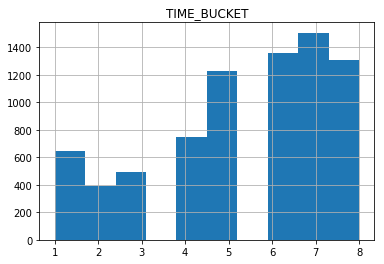

In [51]:
data_train[data_train['IS_FIRE'] == True].hist(column='TIME_BUCKET')

False    76703
True      7673
Name: IS_FIRE, dtype: int64

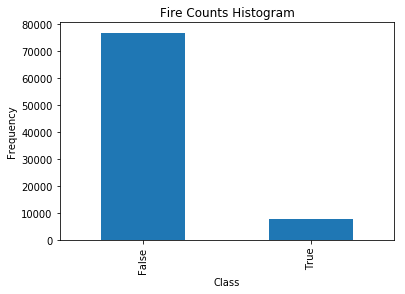

In [52]:
y_train = data_train['IS_FIRE']

pd.value_counts(y_train).plot.bar()
plt.title('Fire Counts Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y_train.value_counts()

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()
arrond_df = pd.DataFrame(labelencoder.fit_transform(data_train['NOM_ARROND']))

onehotencoder = OneHotEncoder()
arrond_df = pd.DataFrame(onehotencoder.fit_transform(arrond_df).toarray())
arrond_df.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(84376, 35)

In [54]:
X_train = pd.concat([arrond_df, data_train[['Month','Day','TIME_BUCKET']]], axis=1)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Month,Day,TIME_BUCKET
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4


In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
X = X_sm
y = y_sm

True     76703
False    76703
dtype: int64

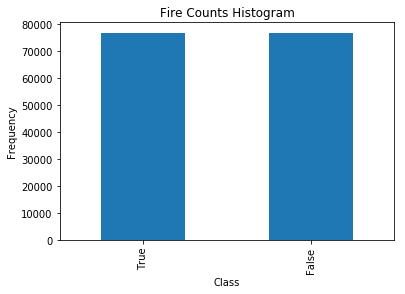

In [56]:
pd.value_counts(y_sm).plot.bar()
plt.title('Fire Counts Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_sm)

In [57]:
y_sm.shape

(153406,)

In [58]:
X_sm.shape

(153406, 38)

In [0]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2)

In [0]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [0]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [66]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [68]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [69]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
96.17,Random Forest
96.17,Decision Tree
89.82,KNN
66.22,Support Vector Machines
66.09,Logistic Regression
64.71,Naive Bayes
53.10,Perceptron
51.51,Stochastic Gradient Decent


In [70]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.90092879 0.89603194 0.89774301 0.89903846 0.89765319 0.89765319
 0.90270535 0.89602347 0.90335724 0.89814211]
Mean: 0.8989276757452878
Standard Deviation: 0.0024494363473516103


In [71]:
x_cols = pd.Series(range(0,38))
x_cols[35] = 'Month'
x_cols[36] = 'Day'
x_cols[37] = 'TIME_BUCKET'
print(x_cols.values)

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 'Month' 'Day' 'TIME_BUCKET']


In [72]:
importances = pd.DataFrame({'feature':x_cols.values,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Day,0.197
Month,0.178
TIME_BUCKET,0.149
32,0.040
15,0.036
5,0.034
22,0.029
0,0.029
24,0.028


In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[55628,  5633],
       [ 6778, 54685]])

In [74]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.906611625053881
Recall: 0.8897222719359614


In [75]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.8980875506031318

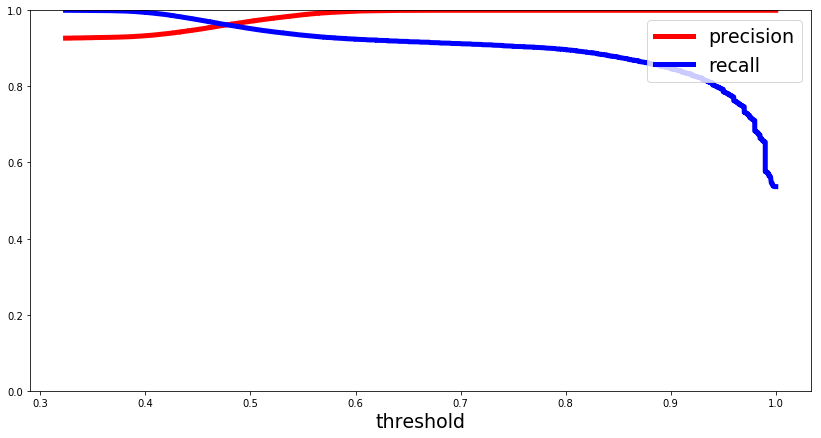

In [76]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

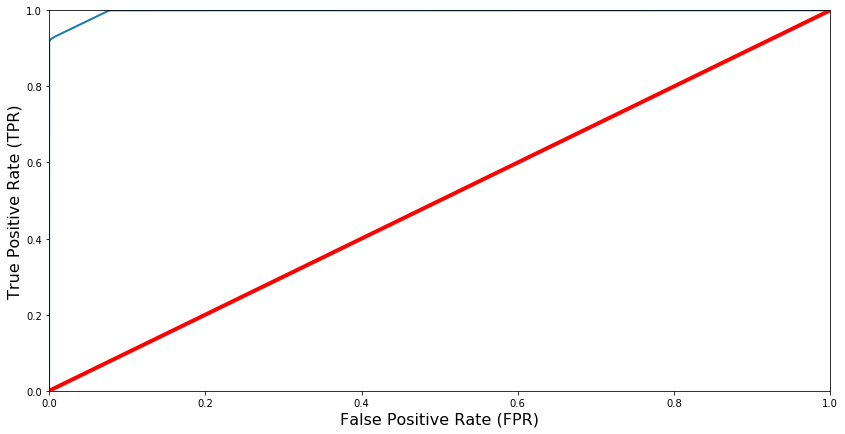

In [77]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9970463784378292
